In [1]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import nxviz as nv

/Users/WN/opt/anaconda3/lib/python3.7/site-packages/nxviz/__init__.py:29: UserWarning: 
nxviz has a new API! Version 0.7.4 onwards, the old class-based API is being
deprecated in favour of a new API focused on advancing a grammar of network
graphics. If your plotting code depends on the old API, please consider
pinning nxviz at version 0.7.4, as the new API will break your old code.

To check out the new API, please head over to the docs at
https://ericmjl.github.io/nxviz/ to learn more. We hope you enjoy using it!

(This deprecation message will go away in version 1.0.)

  """


In [2]:
data = []

with open('./amazon-meta.txt', 'r') as f:
    product = {}
    for line in f:
        line = line.strip()
        if line.startswith('Id:'):
            product['Id'] = line.split()[1]
        elif line.startswith('ASIN:'):
            product['ASIN'] = line.split()[1]
        elif line.startswith('title:'):
            product['title'] = line.split(': ', 1)[1]
        elif line.startswith('salesrank:'):
            product['salesrank'] = int(line.split()[1])
        elif line.startswith('similar:'):
            product['similar'] = line.split()[2:]
        elif line.startswith('|'):
            categories = []
            categories.append(line)
            product['categories'] = categories
        elif line.startswith('reviews:'):
            parts = line.split()
            product['reviews'] = {
#                 'total': int(parts[2]),
#                 'downloaded': int(parts[4]),
                'avg_rating': parts[7]
                }
        elif line.strip() == '':
            if product:
                data.append(product)
                product = {}
    


In [3]:
df = pd.DataFrame(data)

In [5]:
df.head()

,Id,ASIN,title,salesrank,similar,categories,reviews
0,0,0771044445,NaN,NaN,NaN,NaN,NaN
1,1,0827229534,Patterns of Preaching: A Sermon Sampler,396585.0,"[0804215715, 156101074X, 0687023955, 068707423...",[|Books[283155]|Subjects[1000]|Religion & Spir...,{'avg_rating': '5'}
2,2,0738700797,Candlemas: Feast of Flames,168596.0,"[0738700827, 1567184960, 1567182836, 073870052...",[|Books[283155]|Subjects[1000]|Religion & Spir...,{'avg_rating': '4.5'}
3,3,0486287785,World War II Allied Fighter Planes Trading Cards,1270652.0,[],[|Books[283155]|Subjects[1000]|Home & Garden[4...,{'avg_rating': '5'}
4,4,0842328327,Life Application Bible Commentary: 1 and 2 Tim...,631289.0,"[0842328130, 0830818138, 0842330313, 084232861...",[|Books[283155]|Subjects[1000]|Religion & Spir...,{'avg_rating': '4'}


In [6]:
df.columns

Index(['Id', 'ASIN', 'title', 'salesrank', 'similar', 'categories', 'reviews'], dtype='object')

In [7]:
# dropped all rows with NaN

df = df.dropna()

df

,Id,ASIN,title,salesrank,similar,categories,reviews
1,1,0827229534,Patterns of Preaching: A Sermon Sampler,396585.0,"[0804215715, 156101074X, 0687023955, 068707423...",[|Books[283155]|Subjects[1000]|Religion & Spir...,{'avg_rating': '5'}
2,2,0738700797,Candlemas: Feast of Flames,168596.0,"[0738700827, 1567184960, 1567182836, 073870052...",[|Books[283155]|Subjects[1000]|Religion & Spir...,{'avg_rating': '4.5'}
3,3,0486287785,World War II Allied Fighter Planes Trading Cards,1270652.0,[],[|Books[283155]|Subjects[1000]|Home & Garden[4...,{'avg_rating': '5'}
4,4,0842328327,Life Application Bible Commentary: 1 and 2 Tim...,631289.0,"[0842328130, 0830818138, 0842330313, 084232861...",[|Books[283155]|Subjects[1000]|Religion & Spir...,{'avg_rating': '4'}
5,5,1577943082,Prayers That Avail Much for Business: Executive,455160.0,"[157794349X, 0892749504, 1577941829, 089274956...",[|Books[283155]|Subjects[1000]|Religion & Spir...,{'avg_rating': '0'}
...,...,...,...,...,...,...,...
548547,548547,B000059TOC,The Drifter,0.0,"[630366704X, B0002ERXB8, B0001932ZU, B0001VTPU...",[|[265523]|Amazon.com Stores[285080]|Amazon.co...,{'avg_rating': '5'}
548548,548548,B00006JBIX,The House Of Morecock,0.0,"[B0002HOE6C, B0002I84JO, B00004WZQN, B00069CQ8...",[|[139452]|DVD[130]|Specialty Stores[498862]|I...,{'avg_rating': '3'}
548549,548549,0879736836,Catholic Bioethics and the Gift of Human Life,0.0,"[1931709920, 188187110X, 081890643X, 158051046...",[|Books[283155]|Subjects[1000]|Science[75]|His...,{'avg_rating': '4'}
548550,548550,B00008DDST,"1, 2, 3 Soleils: Taha, Khaled, Faudel",0.0,"[B00012FWNC, B0002UNQQI, B00069FKLO, B0000CNTH...",[|[265523]|Amazon.com Stores[285080]|Amazon.co...,{'avg_rating': '5'}


In [8]:
# confirming that all values in the ASIN column is unique by matching the unique count 
# to the number of rows in the df

len(list(df.ASIN.unique()))



519781

In [132]:
subset_df = df.iloc[:500,:]
subset_df

,Id,ASIN,title,salesrank,similar,categories,reviews
1,1,0827229534,Patterns of Preaching: A Sermon Sampler,396585.0,"[0804215715, 156101074X, 0687023955, 068707423...",[|Books[283155]|Subjects[1000]|Religion & Spir...,{'avg_rating': '5'}
2,2,0738700797,Candlemas: Feast of Flames,168596.0,"[0738700827, 1567184960, 1567182836, 073870052...",[|Books[283155]|Subjects[1000]|Religion & Spir...,{'avg_rating': '4.5'}
3,3,0486287785,World War II Allied Fighter Planes Trading Cards,1270652.0,[],[|Books[283155]|Subjects[1000]|Home & Garden[4...,{'avg_rating': '5'}
4,4,0842328327,Life Application Bible Commentary: 1 and 2 Tim...,631289.0,"[0842328130, 0830818138, 0842330313, 084232861...",[|Books[283155]|Subjects[1000]|Religion & Spir...,{'avg_rating': '4'}
5,5,1577943082,Prayers That Avail Much for Business: Executive,455160.0,"[157794349X, 0892749504, 1577941829, 089274956...",[|Books[283155]|Subjects[1000]|Religion & Spir...,{'avg_rating': '0'}
...,...,...,...,...,...,...,...
517,517,B00000K2C5,Sacred Steel Live!,86612.0,"[B00006IXGI, B00005M98F, B0000A4GC9, B00005QDI...",[|Music[5174]|Specialty Stores[468040]|Indie M...,{'avg_rating': '5'}
518,518,B00000K2C9,Jazz Steppin',213856.0,"[B00000I9DH, B000001UWW, B00004TE1B, B000001UW...",[|Music[5174]|Specialty Stores[468040]|Indie M...,{'avg_rating': '4'}
519,519,9500715899,El corazón de piedra verde,1703480.0,[],[|Books[283155]|Subjects[1000]|Literature & Fi...,{'avg_rating': '0'}
520,520,0764420747,Training Youth for Dynamic Leadership,631693.0,"[0310227976, 0967798124, 0764421042, 078794059...",[|Books[283155]|Subjects[1000]|Religion & Spir...,{'avg_rating': '0'}


In [162]:
G = nx.DiGraph()

i = 1

while i <= len(subset_df):
    try:
        G.add_node(subset_df['ASIN'][i], salesrank=subset_df['salesrank'][i])
        for j in subset_df['similar'][i]:        
            G.add_edge(subset_df['ASIN'][i], j)
        i = i + 1
    except KeyError:
        i = i + 1
        continue

In [163]:
print('edges count:', len(list(G.edges())))

print('nodes count:', len(list(G.nodes())))

edges count: 1640
nodes count: 2089


In [164]:
list(G.nodes(data=True))

[('0827229534', {'salesrank': 396585.0}),
 ('0804215715', {}),
 ('156101074X', {}),
 ('0687023955', {}),
 ('0687074231', {}),
 ('082721619X', {}),
 ('0738700797', {'salesrank': 168596.0}),
 ('0738700827', {}),
 ('1567184960', {}),
 ('1567182836', {}),
 ('0738700525', {}),
 ('0738700940', {}),
 ('0486287785', {'salesrank': 1270652.0}),
 ('0842328327', {'salesrank': 631289.0}),
 ('0842328130', {}),
 ('0830818138', {}),
 ('0842330313', {}),
 ('0842328610', {}),
 ('0842328572', {}),
 ('1577943082', {'salesrank': 455160.0}),
 ('157794349X', {}),
 ('0892749504', {}),
 ('1577941829', {}),
 ('0892749563', {}),
 ('1577946006', {}),
 ('0486220125', {'salesrank': 188784.0}),
 ('0486401960', {}),
 ('0452283612', {}),
 ('0486229076', {}),
 ('0714840343', {}),
 ('0374528993', {}),
 ('B00000AU3R', {'salesrank': 5392.0}),
 ('B00002616C', {}),
 ('B0000261KX', {}),
 ('B00006AM8D', {}),
 ('B000059OB9', {}),
 ('B0000261O7', {}),
 ('0231118597', {'salesrank': 277409.0}),
 ('B000067D0Y', {}),
 ('0375727191'

In [165]:
list(G.edges(data=True))

[('0827229534', '0804215715', {}),
 ('0827229534', '156101074X', {}),
 ('0827229534', '0687023955', {}),
 ('0827229534', '0687074231', {}),
 ('0827229534', '082721619X', {}),
 ('0738700797', '0738700827', {}),
 ('0738700797', '1567184960', {}),
 ('0738700797', '1567182836', {}),
 ('0738700797', '0738700525', {}),
 ('0738700797', '0738700940', {}),
 ('0842328327', '0842328130', {}),
 ('0842328327', '0830818138', {}),
 ('0842328327', '0842330313', {}),
 ('0842328327', '0842328610', {}),
 ('0842328327', '0842328572', {}),
 ('1577943082', '157794349X', {}),
 ('1577943082', '0892749504', {}),
 ('1577943082', '1577941829', {}),
 ('1577943082', '0892749563', {}),
 ('1577943082', '1577946006', {}),
 ('0486220125', '0486401960', {}),
 ('0486220125', '0452283612', {}),
 ('0486220125', '0486229076', {}),
 ('0486220125', '0714840343', {}),
 ('0486220125', '0374528993', {}),
 ('B00000AU3R', 'B00002616C', {}),
 ('B00000AU3R', 'B0000261KX', {}),
 ('B00000AU3R', 'B00006AM8D', {}),
 ('B00000AU3R', 'B00

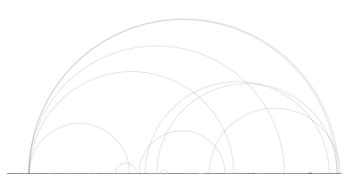

In [167]:
ap = nv.ArcPlot(G)

ap.draw

plt.show()

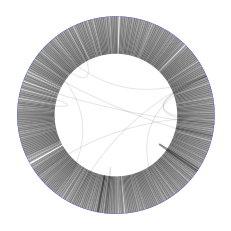

In [168]:
cp = nv.CircosPlot(G)

cp.draw

plt.show()

In [174]:
degrees = [len(list(G.neighbors(n))) for n in G.nodes()]
degrees

[5,
 0,
 0,
 0,
 0,
 0,
 5,
 0,
 0,
 0,
 0,
 0,
 0,
 5,
 0,
 0,
 0,
 0,
 0,
 5,
 0,
 0,
 0,
 0,
 0,
 5,
 0,
 0,
 0,
 0,
 0,
 5,
 0,
 0,
 0,
 0,
 0,
 5,
 0,
 0,
 0,
 0,
 0,
 0,
 5,
 0,
 0,
 0,
 0,
 0,
 5,
 0,
 0,
 0,
 0,
 0,
 5,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 5,
 0,
 0,
 0,
 0,
 0,
 5,
 0,
 0,
 0,
 0,
 0,
 4,
 0,
 0,
 0,
 0,
 5,
 0,
 0,
 0,
 0,
 0,
 5,
 0,
 0,
 0,
 0,
 0,
 5,
 0,
 0,
 0,
 0,
 0,
 5,
 0,
 0,
 0,
 0,
 0,
 5,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 5,
 0,
 0,
 0,
 0,
 0,
 5,
 0,
 0,
 0,
 0,
 0,
 5,
 0,
 0,
 0,
 0,
 0,
 3,
 0,
 0,
 0,
 5,
 0,
 0,
 0,
 0,
 0,
 5,
 0,
 0,
 0,
 0,
 0,
 3,
 0,
 0,
 0,
 5,
 0,
 0,
 0,
 0,
 0,
 5,
 0,
 0,
 0,
 0,
 0,
 5,
 0,
 0,
 0,
 0,
 0,
 5,
 0,
 0,
 0,
 0,
 0,
 0,
 5,
 0,
 0,
 0,
 0,
 0,
 5,
 0,
 0,
 0,
 0,
 0,
 5,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 5,
 0,
 0,
 0,
 0,
 0,
 5,
 0,
 0,
 0,
 0,
 0,
 5,
 0,
 0,
 0,
 0,
 0,
 5,
 0,
 0,
 0,
 0,
 0,
 5,
 0,
 0,
 0,
 0,
 0,
 5,
 0,
 0,
 0,
 0,
 0,
 5,
 0,
 0,
 0,
 0,
 0,
 5,
 0,
 0,
 0,
 0,
 0,
 5,
 0,
 0,
 0,
 0,
 0,


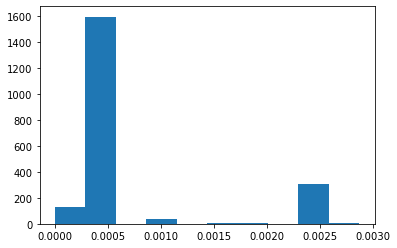

In [170]:
degree_cent = nx.degree_centrality(G)

plt.figure()
plt.hist(list(degree_cent.values()))
plt.show()

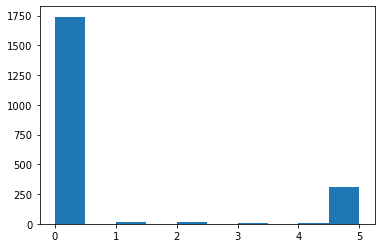

In [171]:
plt.figure()
plt.hist(degrees)
plt.show()

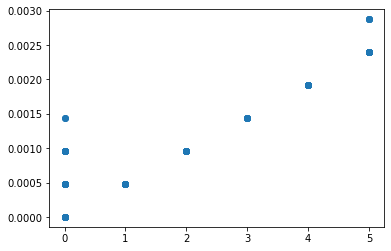

In [173]:
plt.figure()
plt.scatter(degrees, list(degree_cent.values()))
plt.show()